In [1]:
%load_ext autoreload
%autoreload 2

import sys, os; sys.path.append(os.path.dirname(os.getcwd())) 

import matplotlib.pyplot as plt
from ipywidgets import *

import numpy as np
from metric_spaces import MetricData
from metric_spaces.sphere import Sphere, r2_to_angle
from regression.frechet_regression import LocalFrechet, GlobalFrechet
from regression.kernels import epanechnikov, gaussian

In [5]:
m = lambda x: 5 + 5*x[:,0]**2 + np.sin(20 * x[:,0]) - 10*x[:,0]**3 

def gen_data(N, eps=0.1):
    x = np.random.rand(N*1).reshape((N,1))

    theta = m(x) + eps*np.random.randn(N)
    y = np.c_[np.cos(theta), np.sin(theta)]
    return x, MetricData(Sphere(1), y)

N = 200; eps = 0.5
x_train, y_train = gen_data(N, eps)
x_test, y_test = gen_data(100, eps)

global_frechet = GlobalFrechet().fit(x_train, y_train)
local_frechet = LocalFrechet(gaussian, 0.02).fit(x_train, y_train)

preds = [global_frechet.predict(x_test), local_frechet.predict(x_test)]

errs = np.zeros((2, x_test.shape[0]))
errs[0,:] = Sphere(1).d(y_test, preds[0])
errs[1,:] = Sphere(1).d(y_test, preds[1])

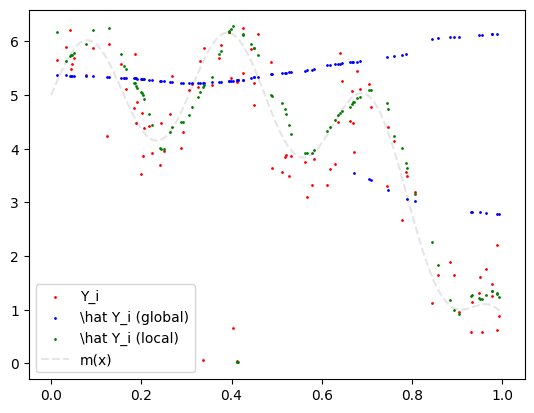

In [6]:
%matplotlib inline

rf_angles = r2_to_angle(preds[0].data)
nw_angles = r2_to_angle(preds[1].data)
theta_test = r2_to_angle(y_test.data)

plt.scatter(x_test, theta_test, c='red',s=1,label="Y_i")
plt.scatter(x_test, rf_angles, c='blue',s=1,label="\\hat Y_i (global)")
plt.scatter(x_test, nw_angles, c='green',s=1,label="\\hat Y_i (local)")
plt.plot(np.linspace(0,1,100), m(np.linspace(0,1,100).reshape((100,1))), c='black', linestyle='--', label='m(x)', alpha=0.1)
plt.legend()

<IPython.core.display.Javascript object>


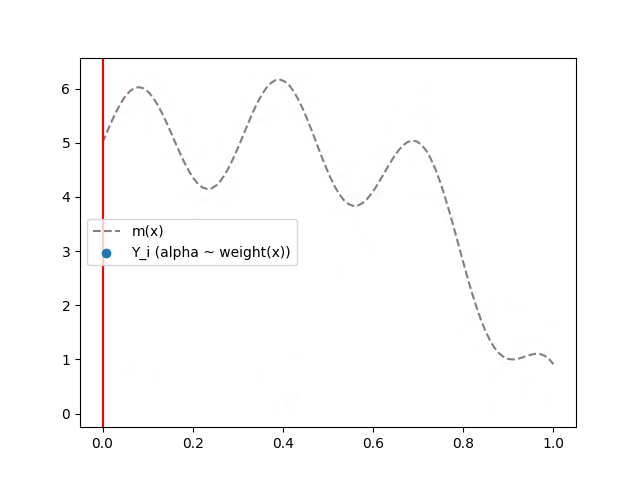

interactive(children=(FloatSlider(value=0.5, description='_x', max=1.5, min=-0.5), Output()), _dom_classes=('w…

In [12]:
%matplotlib notebook

theta_train = r2_to_angle(y_train.data)

est = local_frechet

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
weights = est.weights_for([0.5])
ax.plot(np.linspace(0,1,100), m(np.linspace(0,1,100).reshape((100,1))), c='gray', linestyle='--', label='m(x)')
scat = ax.scatter(x_train, theta_train, label='Y_i (alpha ~ weight(x))')
eval_pt = ax.axvline(0.5, c='red')
ax.legend()

def update(_x = 0.5):
    weights = est.weights_for([_x])
    scat.set_alpha(weights)
    eval_pt.set_xdata(_x)
    fig.canvas.draw_idle()

interact(update);

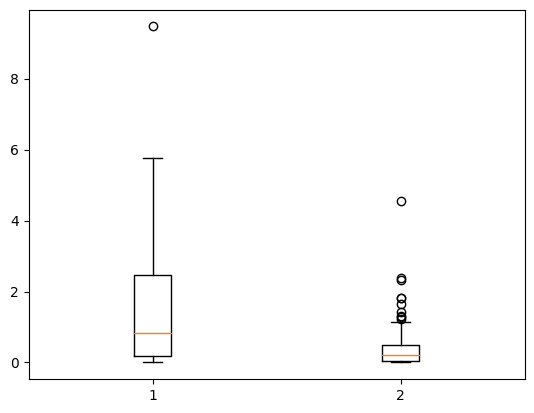

In [7]:
%matplotlib inline
plt.boxplot(errs.T);